# Job Title Classification By Industry

#### loading libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

#### reading the dataset

In [3]:
data = pd.read_csv("Job titles and industries.csv")

#### data exploration

In [4]:
data.head()

,job title,industry
0,technical support and helpdesk supervisor - co...,IT
1,senior technical support engineer,IT
2,head of it services,IT
3,js front end engineer,IT
4,network and telephony controller,IT


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8586 entries, 0 to 8585
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job title  8586 non-null   object
 1   industry   8586 non-null   object
dtypes: object(2)
memory usage: 134.3+ KB


In [6]:
data.describe()

,job title,industry
count,8586,8586
unique,3890,4
top,marketing executive,IT
freq,91,4746


we have only 2 cols, both are textual , we have no nulls to worry about , but we still need to deal with text data

#### explore the label 

In [7]:
industry = data['industry']

In [9]:
industry.value_counts(normalize=True)

IT             0.552760
Marketing      0.236548
Education      0.167133
Accountancy    0.043559
Name: industry, dtype: float64

#### there is class impalance here , Accountancy is represented with less than 1% in data

#### Data Visualization

In [16]:
def hist_pie(df,target):
    fig, ax=plt.subplots(1,2,figsize=(15,6))
    _ = sns.histplot(x=target, data=df, ax=ax[0],bins=4,hue=target,)
    _ = df[target].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1])

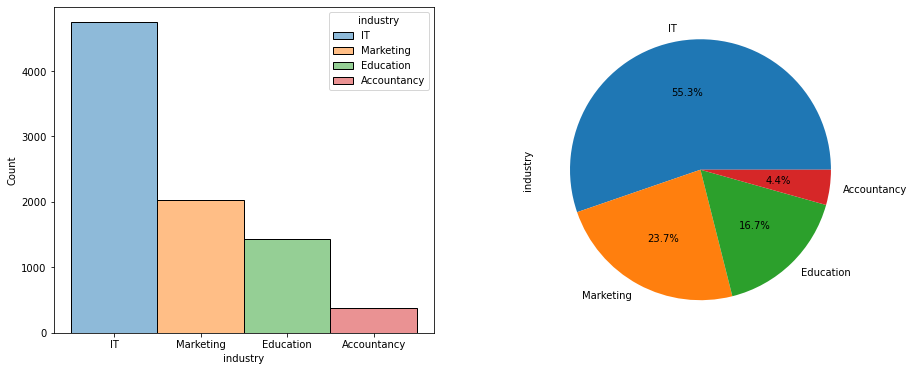

In [17]:
hist_pie(data,'industry')

### Data Preprocessing

since machine learning models accepts only numbers , we need to deal with "job title" column

In [36]:
job_title = [a for a in data['job title'].values] 

In [37]:
job_title

['technical support and helpdesk supervisor - county buildings, ayr soa04086',
 'senior technical support engineer',
 'head of it services',
 'js front end engineer',
 'network and telephony controller',
 'privileged access management expert',
 'devops engineers x 3 - global brand',
 'devops engineers x 3 - global brand',
 'data modeller',
 'php web developer £45,000 based in london',
 'devops engineers x 3 - global brand',
 'devops engineers x 3 - global brand',
 'solution / technical architect - ethical brand',
 'lead developer - ethical brand',
 'junior front-end developer',
 'vb .net web developer, milton keynes, £45k',
 'data scientist, newcastle, up to £40k',
 'senior bi engineer',
 'machine learning engineer',
 'full stack developer, oxfordshire, £40k',
 'c# software developer, waltham cross, £55k',
 'senior data engineer',
 'erp support analyst - unit4, agresso business world',
 'application support analyst - cheshire - financial services',
 'accountancy software trainer - manc

In [38]:
job_title_length = [len(a.split(' ')) for a in data['job title'].values] 

In [39]:
max(job_title_length), min(job_title_length), np.mean(job_title_length), np.std(job_title_length)

(20, 1, 4.102958304216166, 2.3872424939232766)

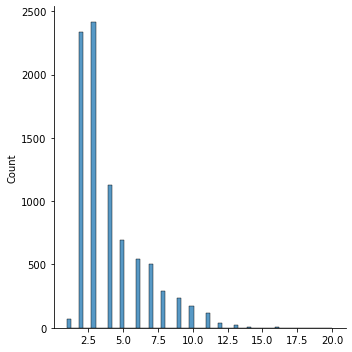

In [41]:
sns.displot(job_title_length)

little bit tricky since there is special characters , punctuation and othre stuff we need to deal with

###### generating wordcloud for the titles

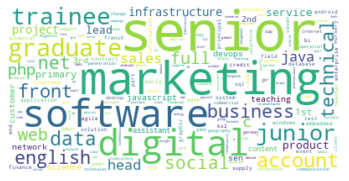

In [95]:
from wordcloud import WordCloud
text = " ".join(cat.split()[0] for cat in data['job title'])
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

###### word count for each word in job titles

In [96]:
data['job title'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).sort_values(ascending=False)

-                     2100.0
developer             1411.0
engineer              1039.0
manager                901.0
marketing              881.0
                       ...  
graduates-teaching       1.0
groupwork                1.0
wrexham                  1.0
berwyn,                  1.0
(arabic/english)         1.0
Length: 2711, dtype: float64

 we need to clean job title first before converting it to separate features

In [97]:
import re
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
stemmer = WordNetLemmatizer()

def clean_text(df):
    title_descriptions = []
    for i in range(len(df)):
        title_description = str(df.iloc[i,0])
#         print(title_description)
        
        # Remove all the special characters
        title_description = re.sub(r'\W', ' ', str(df.iloc[i,0]))

        # remove all single characters
        title_description = re.sub(r'\s+[a-zA-Z]\s+', ' ', title_description)

        # Remove single characters from the start ; eg : a 
        title_description = re.sub(r'\^[a-zA-Z]\s+', ' ', title_description) 

        # Substituting multiple spaces with single space
        title_description = re.sub(r'\s+', ' ', title_description, flags=re.I)

        # Converting to Lowercase
        title_description = title_description.lower()

        # Lemmatization , to send words back to its root
        title_description = title_description.split()

        title_description = [stemmer.lemmatize(word) for word in title_description]
        title_description = ' '.join(title_description)

        title_descriptions.append(title_description)
    return title_descriptions

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\20100\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [66]:
job_titles = clean_text(data)

In [98]:
data['job title'] = job_titles

In [99]:
#import necessarry libraries

from sklearn.feature_extraction.text import CountVectorizer,FeatureHasher ,HashingVectorizer, TfidfVectorizer
import nltk
# nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords

use the bag of words model to convert text documents into corresponding numerical features, use TFIDF to measue word frequency among all job decriptions

In [109]:
vectorizer = TfidfVectorizer(max_features=1000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(job_titles).toarray()

In [110]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [111]:
X.shape

(8586, 679)

we have only distinct 679 after removing the stopwords

out data is a sparse data , there is many techniques to handle this ( we will visit FeatureHasher later)

# Data Modeling

### Unsupervised learning 

kmeans clustering

In [137]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
km.fit(X)
km.labels_


array([0, 1, 0, ..., 2, 2, 0])

In [170]:
pd.crosstab(y,km.labels_)

col_0,0,1,2,3
industry,,,,
Accountancy,370,1,3,0
Education,1397,6,23,9
IT,2331,1059,17,1339
Marketing,1151,7,849,24


there is heavy overlapping for IT and marketing classes with other classes

T-SNE

In [139]:
X.shape

(8586, 679)

In [141]:
from sklearn.manifold import TSNE

t = TSNE(n_components=2,learning_rate=100)
X_new = t.fit_transform(X)

In [ ]:
color

<AxesSubplot:>

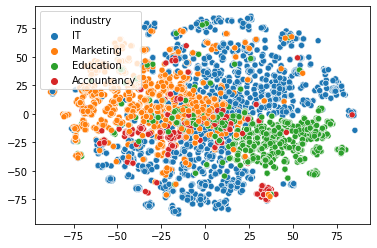

In [145]:
sns.scatterplot(x=X_new[:,0],y=X_new[:,1],hue=y)

there is a little bit overlap, specially for Accountancy jobs, they're not distinguishable easily like other titles 

### split for testing

we will use kfold validation to get more confident about out local score

In [165]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [166]:
X,y = X,data['industry']


models = [MultinomialNB(),RandomForestClassifier(),SVC(),GradientBoostingClassifier(),LogisticRegression()]
# models = [MultinomialNB()]

results = []
kf = KFold(n_splits=5,random_state=1,shuffle=True)
for model in models:
    print(model)
    i=1
    for train_index, test_index in kf.split(X,y):
                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    #             sm = BorderlineSMOTE()
    #             X_train, y_train = sm.fit_resample(X_train, y_train)
                model.fit(X_train,y_train)
                preds_test = model.predict(X_test)
                preds_train = model.predict(X_train)        
                preds_test = model.predict(X_test)
                print("fold {}  train accuracy is {}".format(i,accuracy_score(y_train,preds_train)))
                print("fold {}  test accuracy is {}".format(i,accuracy_score(y_test,preds_test)))
#                 results.append([model,i ,accuracy_score(y_train,preds_train), accuracy_score(y_test,preds_test)])

                i+=1
#                 cm = confusion_matrix(y_test,preds_test)
#                 ConfusionMatrixDisplay(cm).plot()
#                 plt.xticks(rotation=90)
#                 plt.show()  
    print("=============")



MultinomialNB()
fold 1  train accuracy is 0.9199184624344787
fold 1  test accuracy is 0.9161816065192084
fold 2  train accuracy is 0.9218226816130441
fold 2  test accuracy is 0.9097262667443214
fold 3  train accuracy is 0.9200757024312127
fold 3  test accuracy is 0.9143855562026791
fold 4  train accuracy is 0.9215315184160722
fold 4  test accuracy is 0.9132207338380897
fold 5  train accuracy is 0.9218226816130441
fold 5  test accuracy is 0.9138031450203844
RandomForestClassifier()
fold 1  train accuracy is 0.9768491555037857
fold 1  test accuracy is 0.929569266589057
fold 2  train accuracy is 0.9771436890377057
fold 2  test accuracy is 0.935934769947583
fold 3  train accuracy is 0.9758334546513321
fold 3  test accuracy is 0.9411764705882353
fold 4  train accuracy is 0.9771436890377057
fold 4  test accuracy is 0.930110658124636
fold 5  train accuracy is 0.9771436890377057
fold 5  test accuracy is 0.9394292370413512
SVC()
fold 1  train accuracy is 0.9630168899242866
fold 1  test accuracy

lets try the same but try to balance classes

In [168]:
from imblearn.over_sampling import SMOTE

X,y = X,data['industry']


models = [MultinomialNB(),RandomForestClassifier(),SVC(),GradientBoostingClassifier(),LogisticRegression()]
# models = [MultinomialNB()]

results = []
kf = KFold(n_splits=5,random_state=1,shuffle=True)
for model in models:
    print(model)
    i=1
    for train_index, test_index in kf.split(X,y):
                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y.iloc[train_index], y.iloc[test_index]
                sm = SMOTE()
                X_train, y_train = sm.fit_resample(X_train, y_train)
                model.fit(X_train,y_train)
                preds_test = model.predict(X_test)
                preds_train = model.predict(X_train)        
                preds_test = model.predict(X_test)
                print("fold {}  train accuracy is {}".format(i,accuracy_score(y_train,preds_train)))
                print("fold {}  test accuracy is {}".format(i,accuracy_score(y_test,preds_test)))
#                 results.append([model,i ,accuracy_score(y_train,preds_train), accuracy_score(y_test,preds_test)])

                i+=1
#                 cm = confusion_matrix(y_test,preds_test)
#                 ConfusionMatrixDisplay(cm).plot()
#                 plt.xticks(rotation=90)
#                 plt.show()  
    print("=============")


MultinomialNB()
fold 1  train accuracy is 0.923492230708454
fold 1  test accuracy is 0.9033760186263097
fold 2  train accuracy is 0.9229298523206751
fold 2  test accuracy is 0.9044845661036692
fold 3  train accuracy is 0.9261423319327731
fold 3  test accuracy is 0.9172976121141526
fold 4  train accuracy is 0.9242524477374967
fold 4  test accuracy is 0.9015725101921956
fold 5  train accuracy is 0.9283088235294118
fold 5  test accuracy is 0.912638322655795
RandomForestClassifier()
fold 1  train accuracy is 0.9855807216223335
fold 1  test accuracy is 0.9225844004656577
fold 2  train accuracy is 0.9862869198312236
fold 2  test accuracy is 0.9283634245777519
fold 3  train accuracy is 0.9845719537815126
fold 3  test accuracy is 0.9365171811298777
fold 4  train accuracy is 0.9862397459645409
fold 4  test accuracy is 0.9289458357600466
fold 5  train accuracy is 0.9852284663865546
fold 5  test accuracy is 0.9318578916715201
SVC()
fold 1  train accuracy is 0.9655649196734264
fold 1  test accurac

C:\Users\20100\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


fold 1  train accuracy is 0.9359362654727417
fold 1  test accuracy is 0.9208381839348079


C:\Users\20100\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


fold 2  train accuracy is 0.9382911392405063
fold 2  test accuracy is 0.9161327897495631


C:\Users\20100\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


fold 3  train accuracy is 0.9408482142857143
fold 3  test accuracy is 0.9254513686662784


C:\Users\20100\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


fold 4  train accuracy is 0.9325879862397459
fold 4  test accuracy is 0.906814210832848
fold 5  train accuracy is 0.9410451680672269
fold 5  test accuracy is 0.9202096680256261


C:\Users\20100\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### from above results we can conclude that SVM with no oversampling is the best classifier

#### tuning SVC classifier parameters

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix


param_grid = {'C':[1,10,100,1000],'gamma':[10,1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42,stratify=y)
grid = GridSearchCV(SVC(probability=True),param_grid,refit = True, verbose=2,n_jobs=-1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 30.3min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 41.8min finished


GridSearchCV(estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [10, 1, 0.1, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [200]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [201]:
preds = grid.predict(X_test)

In [202]:
print(classification_report(y_test,preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

 Accountancy       0.91      0.79      0.85       112
   Education       0.94      0.87      0.90       431
          IT       0.95      0.97      0.96      1424
   Marketing       0.90      0.91      0.90       609

    accuracy                           0.93      2576
   macro avg       0.92      0.89      0.90      2576
weighted avg       0.93      0.93      0.93      2576

[[  89    2   19    2]
 [   2  375   18   36]
 [   3   11 1386   24]
 [   4   12   41  552]]


# Saving best model to use in REST-API

In [203]:
best_model = grid.best_estimator_

In [204]:
best_model.fit(X,y)

SVC(C=100, gamma=1, probability=True)

In [205]:
import pickle

model_filename = "Pickle_SVM_Model.pkl"  
vectorizer_filename = 'Pickle_vectorizer.pkl'

with open(model_filename, 'wb') as file:  
    pickle.dump(best_model, file)

with open(vectorizer_filename, 'wb') as file:  
    pickle.dump(vectorizer, file)


testing model

In [206]:
with open(model_filename, 'rb') as file:  
    m = pickle.load(file)

m

SVC(C=100, gamma=1, probability=True)

In [207]:
with open(vectorizer_filename, 'rb') as file:  
    v = pickle.load(file)

v

TfidfVectorizer(max_df=0.7, max_features=1000, min_df=5,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

sample data

In [208]:
job_describtion_sample = ["IT Persion required"]

In [209]:
sample = v.transform(job_describtion_sample).toarray()

In [210]:
sample

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [211]:
m.predict(sample)

array(['Education'], dtype=object)

In [212]:
m.predict_proba(sample)

array([[0.04308287, 0.45922396, 0.29560004, 0.20209312]])

Not that accurate but it works  😄

In [213]:
x = np.array(['asd'])

In [214]:
x

array(['asd'], dtype='<U3')

In [217]:
p = m.predict(sample)

In [218]:
p[0]

'Education'

# Calling the API 

In [256]:
import requests 
import json
END_POINT = 'http://127.0.0.1:5000/api/v1/predict/'

In [257]:
def predict(text):
    endpoint = END_POINT+requests.utils.quote(text)
    try:
        r = requests.get(endpoint,timeout=3)
        r.raise_for_status()
        return json.loads(r.text)['prediction']
    except requests.exceptions.HTTPError as errh:
        print ("Http Error:",errh)
    except requests.exceptions.ConnectionError as errc:
        print ("Error Connecting:",errc)
    except requests.exceptions.Timeout as errt:
        print ("Timeout Error:",errt)
    except requests.exceptions.RequestException as err:
        print ("OOps: Something Else",err)
        
    

In [258]:
predict("java developer")

'IT'

In [259]:
predict("science teacher")

'Education'

In [260]:
predict("tax accounting")

'Accountancy'

In [261]:
predict("social media")

'Marketing'